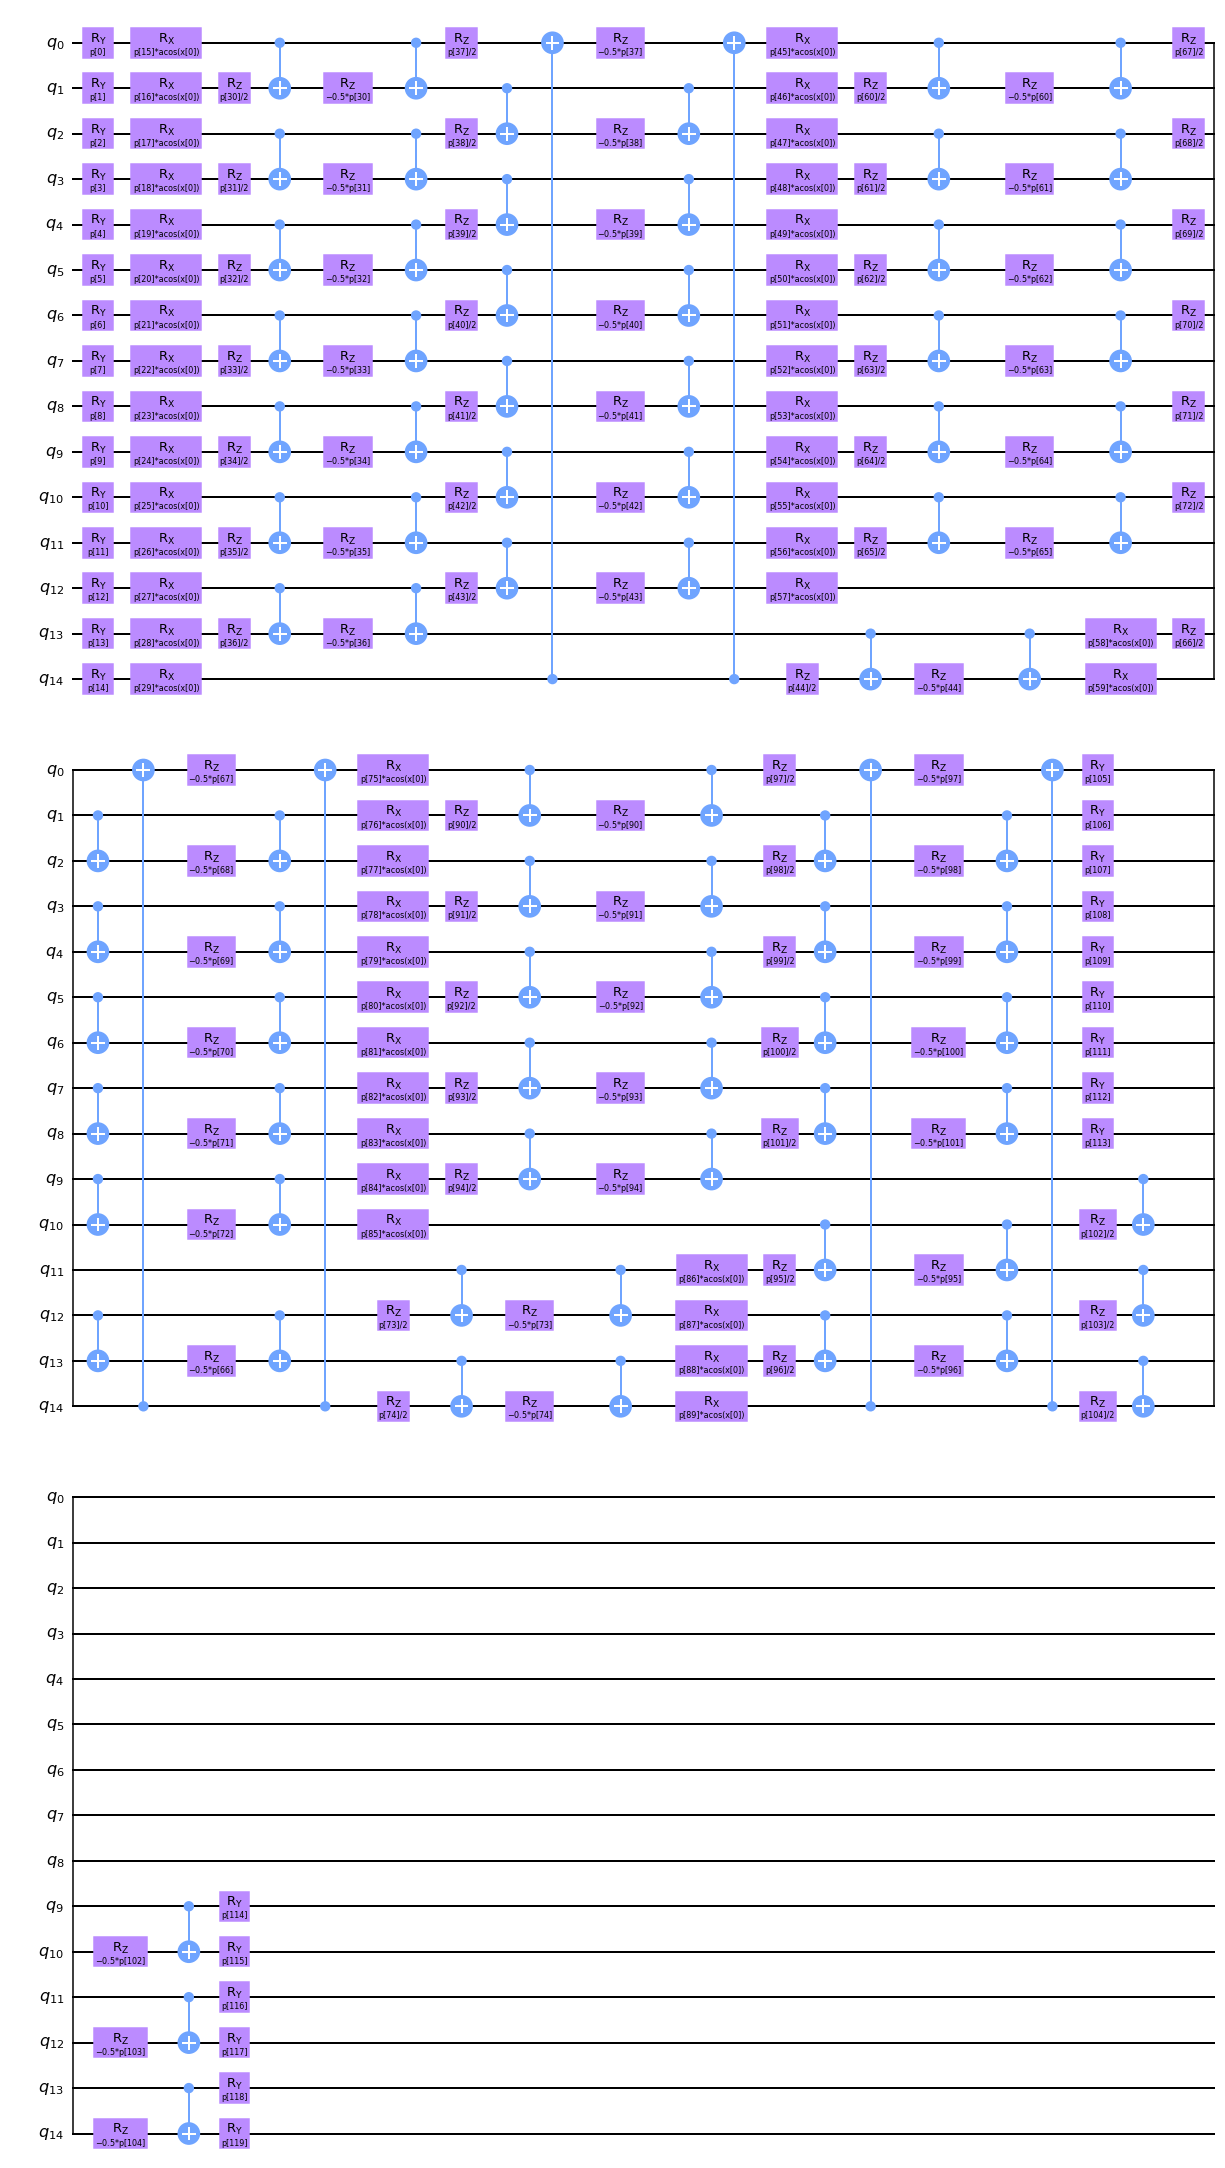

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector,ParameterExpression
from qiskit.primitives import Estimator,Sampler,BackendEstimator,BackendSampler
from qiskit.quantum_info import SparsePauliOp
from qiskit import transpile
from qiskit import Aer


from squlearn.feature_map import ChebPQC
from squlearn.expectation_operator import SinglePauli,SummedPaulis
from squlearn.qnn.qnn import QNN
from squlearn.util import Executor

import copy

#from circuit_tree import *

from squlearn.util.optree import *
from squlearn.util.optree.optree_evaluate import *

num_qubits = 15

pqc = ChebPQC(num_qubits,1,3)

x = ParameterVector("x",pqc.num_features)
p = ParameterVector("p",pqc.num_parameters)

QC = pqc.get_circuit(x,p)



SUPPORTED_GATES = {"x", "y", "z", "h", "rx", "ry", "rz", "p", "u", "cx", "cy", "cz"} #rzz,ryy,rxx also work!
QC = transpile(QC,basis_gates=SUPPORTED_GATES)
QC.draw()

In [2]:
d = derivative(OpTreeLeafCircuit(QC),p)

In [3]:
grad = simplify_copy(d)
#grad = d

In [4]:
len(str(grad))

5871728

In [5]:
xval = [-0.5,0.0,0.5]
np.random.seed(0)
pval = np.random.rand(pqc.num_parameters)
dictionary = dict(zip(p, pval))
dictionary.update(dict(zip(x, xval)))


In [6]:
from pympler import asizeof
circ = get_first_leaf(grad)
full_size = asizeof.asizeof(circ)
print(f"Size of circuit: {full_size} bytes")


Size of circuit: 474456 bytes


In [7]:
op = SummedPaulis(num_qubits)
pop = ParameterVector('p',op.num_parameters)
op_dict=dict(zip(pop,np.random.rand(op.num_parameters)))
pauli_op = op.get_pauli_new(pop)

In [8]:
evaluate_estimator(grad,pauli_op,dictionary,op_dict,Estimator(),detect_circuit_duplicates=False)

pre-processing 0.03899836540222168
run time 22.994718313217163
post processing 0.0009984970092773438


array([-2.11175581e-01, -8.99791204e-02,  5.72848296e-02,  3.02867525e-01,
        1.15035118e-02, -5.73772637e-02,  6.55970644e-02,  2.08863952e-01,
        2.40310878e-01, -1.13484215e-01,  8.37647338e-02,  3.54558662e-02,
        3.83938631e-03,  2.18958161e-01, -1.66957207e-01, -7.55586560e-01,
       -7.94559619e-01, -5.45698943e-02, -8.73456192e-02,  2.15583935e-01,
       -2.28597539e-02,  4.08240588e-01,  3.85502655e-01,  1.49630762e-01,
       -2.79888764e-01, -5.11052495e-01,  1.33940088e-01,  1.29961504e-01,
        4.18604786e-01,  7.59997543e-01, -5.20781291e-02,  2.93176688e-01,
       -2.81553768e-02,  5.18730234e-03, -9.94339055e-02, -5.03952968e-02,
        1.12376359e-01,  1.14756385e-01,  1.51949314e-01,  1.86244566e-01,
        4.80098805e-02,  8.60545406e-02,  7.84482382e-02, -1.92957766e-02,
        2.85380407e-03, -7.94458442e-01, -1.39824285e+00, -7.54621086e-01,
       -1.19872642e-01,  1.10626916e-02, -1.29136261e-01,  3.56419494e-01,
        9.25752656e-02,  

In [9]:
#evaluate_sampler(grad,pauli_op,dictionary,op_dict,Sampler(),detect_circuit_duplicates=False)

In [10]:
estimator_qasm = BackendEstimator(Aer.get_backend('qasm_simulator'),options={'shots':10000})
sampler_qasm = BackendSampler(Aer.get_backend('qasm_simulator'),options={'shots':10000})

TypeError: BackendEstimator.__init__() got an unexpected keyword argument 'shots'

In [ ]:
evaluate_estimator(grad,pauli_op,dictionary,op_dict,estimator_qasm,detect_circuit_duplicates=False)

In [ ]:
evaluate_sampler(grad,pauli_op,dictionary,op_dict,sampler_qasm,detect_circuit_duplicates=False)